In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [4]:
data = pd.read_csv(r"C:\Users\Nayan\Downloads\Data.csv")
state= pd.read_csv(r"C:\Users\Nayan\Downloads\State_data.csv")
ncap_data = pd.read_csv(r"C:\Users\Nayan\Downloads\NCAP_Funding.csv")

In [7]:
data = pd.read_csv(r"C:\Users\Nayan\Downloads\Data.csv")
state_data = pd.read_csv(r"C:\Users\Nayan\Downloads\State_data.csv")
ncap_data = pd.read_csv(r"C:\Users\Nayan\Downloads\NCAP_Funding.csv")

## Spatial aggregation

#### Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [8]:
avg_pm25 = data.groupby('state')["PM2.5"].mean()
print(avg_pm25['Delhi'])
print(avg_pm25)

print(f"{avg_pm25.idxmax()} has maximum avg PM 2.5 concentration")

104.1009176780069
state
Andhra Pradesh        35.049347
Arunachal Pradesh     22.674513
Assam                 57.962372
Bihar                 76.918759
Chandigarh            56.666803
Chhattisgarh          28.761571
Delhi                104.100918
Gujarat               52.462657
Haryana               72.371070
Himachal Pradesh      62.516878
Jammu and Kashmir     28.574696
Jharkhand             54.281545
Karnataka             28.894840
Kerala                29.404793
Madhya Pradesh        45.874375
Maharashtra           43.491415
Manipur               34.911856
Meghalaya             24.513390
Mizoram               11.784922
Nagaland              33.439550
Odisha                52.109504
Puducherry            22.854171
Punjab                52.243166
Rajasthan             54.230341
Sikkim                13.474286
Tamil Nadu            31.289620
Telangana             38.114469
Tripura               57.927642
Uttar Pradesh         70.893996
Uttarakhand           36.788767
West Bengal     

#### Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [7]:
filtered_df = data[data["PM2.5"]>300]
print(filtered_df)
df_2 = filtered_df.groupby("state")['station'].count()
print(f"{df_2.idxmax()} had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023")
print(df_2[df_2.idxmax()])

          Timestamp                                  station       PM2.5  \
178      2017-01-01                        ITO, Delhi - CPCB  524.697917   
733      2017-01-02  IGSC Planetarium Complex, Patna - BSPCB  352.321190   
739      2017-01-02                        ITO, Delhi - CPCB  399.011111   
1110     2017-01-02            Vikas Sadan, Gurugram - HSPCB  344.078958   
1556     2017-01-03              Sanjay Palace, Agra - UPPCB  324.958333   
...             ...                                      ...         ...   
1618520  2024-11-25                     Bawana, Delhi - DPCC  308.390000   
1618898  2024-11-25                     Rohini, Delhi - DPCC  307.600000   
1619037  2024-11-25                Vivek Vihar, Delhi - DPCC  311.350000   
1619779  2024-11-27  IGSC Planetarium Complex, Patna - BSPCB  437.110000   
1620203  2024-11-28                     Bawana, Delhi - DPCC  310.780000   

               PM10              address      city   latitude  longitude  \
178      56

#### Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)


In [9]:
df_3 = data.groupby('state')["PM2.5"].std()
print(f"{df_3.idxmax()} has the highest variability in PM2.5 levels across its monitoring stations in 2023")

Delhi has the highest variability in PM2.5 levels across its monitoring stations in 2023


#### Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?


In [11]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
df_4 = data[(data["Timestamp"].dt.year>=2020) & (data["Timestamp"].dt.year<=2021)]
# print(df_4,"\n")
df_5 = df_4.groupby('state')['PM2.5'].mean()
df_5.reset_index()
# print(df_5)
minimum = df_5.idxmin()
print(f"{minimum} has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)")



Mizoram has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)


## Temporal Aggregation

In [12]:
#1
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format="%Y-%m-%d")      # Convert Timestamp column to datetime format

august_2020 = data[(data['Timestamp'].dt.year == 2020) & (data['Timestamp'].dt.month == 8)]   # Filter data for August 2020

max_pm25_row = august_2020.loc[august_2020['PM2.5'].idxmax()]      # Find the station with the highest PM2.5 value

# Print the station details
print(f"Station with highest PM2.5 in August 2020: {max_pm25_row['station']}")
print(f"PM2.5 Value: {max_pm25_row['PM2.5']}")
print(f"city: {max_pm25_row['city']}, state: {max_pm25_row['state']}")

Station with highest PM2.5 in August 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
PM2.5 Value: 805.51
city: Kalaburagi, state: Karnataka


In [13]:
#2
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format="%Y-%m-%d")     # Convert Timestamp column to datetime format

# Filter data for the year 2018
data_2018 = data[(data['Timestamp'].dt.year == 2018) & (data['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')]

def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Summer'
    elif month in [6,7,8,9]:
        return 'Monsoon'
    return "Other"

# Assign seasons
data_2018['season'] = data_2018['Timestamp'].dt.month.apply(get_season)

seasonal_avg_pm25 = data_2018.groupby('season')['PM2.5'].mean()              # Calculate average PM2.5 for each season

most_polluted_season = seasonal_avg_pm25.idxmax()           # Identify the season with the highest pollution

print("Average PM2.5 concentration for each season in 2018:")
print(seasonal_avg_pm25)
print(f"\nSeason with highest pollution: {most_polluted_season}")

Average PM2.5 concentration for each season in 2018:
season
Monsoon    34.425196
Other      56.825144
Summer           NaN
Winter     67.492344
Name: PM2.5, dtype: float64

Season with highest pollution: Winter


C:\Users\Nayan\AppData\Local\Temp\ipykernel_24284\1129365505.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018['season'] = data_2018['Timestamp'].dt.month.apply(get_season)


C:\Users\Nayan\AppData\Local\Temp\ipykernel_24284\298856099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Day_Type'] = data_2021['Timestamp'].dt.dayofweek.map(lambda x: 'Weekend' if x >= 5 else 'Weekday')  # Create a column for weekdays (0-4) and weekends (5-6)
C:\Users\Nayan\AppData\Local\Temp\ipykernel_24284\298856099.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Month'] = data_2021['Timestamp'].dt.month


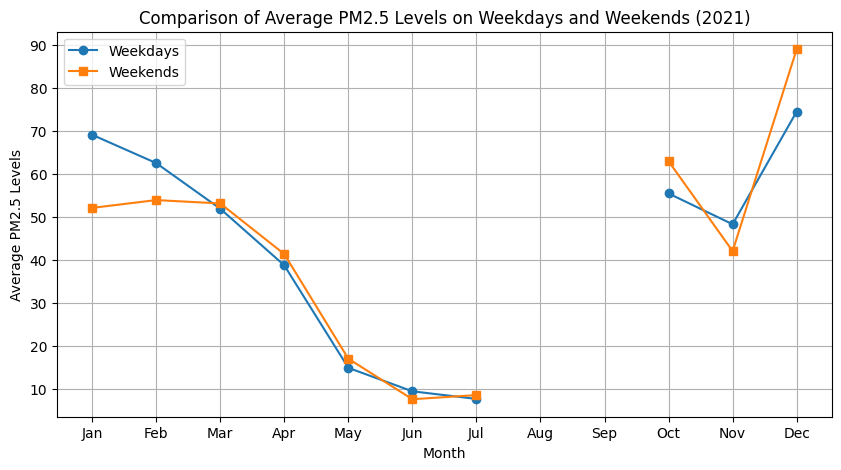

In [14]:
#3
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format="%Y-%m-%d")          # Convert Timestamp column to datetime format

station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"                   # Filter data for the year 2021 and the required station
data_2021 = data[(data['Timestamp'].dt.year == 2021) & (data['station'] == station_name)]

data_2021['Day_Type'] = data_2021['Timestamp'].dt.dayofweek.map(lambda x: 'Weekend' if x >= 5 else 'Weekday')  # Create a column for weekdays (0-4) and weekends (5-6)

# Extract month for grouping
data_2021['Month'] = data_2021['Timestamp'].dt.month

# Calculate monthly average PM2.5 for weekdays and weekends separately
monthly_avg_pm25 = data_2021.groupby(['Month', 'Day_Type'])['PM2.5'].mean().unstack()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25['Weekday'], marker='o', linestyle='-', label='Weekdays')
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25['Weekend'], marker='s', linestyle='-', label='Weekends')

# Labels and title
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Comparison of Average PM2.5 Levels on Weekdays and Weekends (2021)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()


## Spatio Temporal 

In [ ]:
#1
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d")    # Convert Timestamp to datetime format

data_2022 = data[data["Timestamp"].dt.year == 2022]          # Filter for the year 2022

data_2022["Month"] = data_2022["Timestamp"].dt.month       # Extract months and define season masks
summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

# Compute average PM2.5 for each state in summer and monsoon
summer_avg = data_2022[data_2022["Month"].isin(summer_months)].groupby("state")["PM2.5"].mean()
monsoon_avg = data_2022[data_2022["Month"].isin(monsoon_months)].groupby("state")["PM2.5"].mean()

# Combine and calculate percentage change
seasonal_change = pd.DataFrame({
    "Summer_Avg_PM2.5": summer_avg,
    "Monsoon_Avg_PM2.5": monsoon_avg
})
seasonal_change["Percentage_Change"] = ((seasonal_change["Monsoon_Avg_PM2.5"] - seasonal_change["Summer_Avg_PM2.5"]) / seasonal_change["Summer_Avg_PM2.5"]) * 100

# Identify the state with the maximum absolute percentage change
max_change_state = seasonal_change["Percentage_Change"].abs().idxmax()
max_change_value = seasonal_change.loc[max_change_state, "Percentage_Change"]

print(f"State with the most difference in PM2.5 levels: {max_change_state} ({max_change_value:.2f}% change)")   # Display result
print(seasonal_change.sort_values(by="Percentage_Change", ascending=False))    # Display full table


C:\Users\Nayan\AppData\Local\Temp\ipykernel_24284\4035521980.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Year'] = delhi_data['Timestamp'].dt.year        # Extract year and month from Timestamp
C:\Users\Nayan\AppData\Local\Temp\ipykernel_24284\4035521980.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Month'] = delhi_data['Timestamp'].dt.month
C:\Users\Nayan\AppData\Local\Temp\ipykernel_24284\4035521980.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy 

<Figure size 1000x600 with 0 Axes>

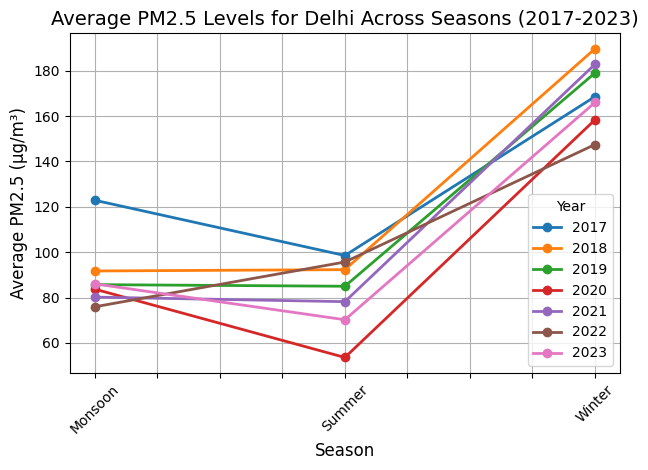

In [16]:
#2
df=data
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d')           # Convert the Timestamp column to datetime format

delhi_data = df[df['city'] == 'Delhi']                    # Filter data for Delhi

delhi_data['Year'] = delhi_data['Timestamp'].dt.year        # Extract year and month from Timestamp
delhi_data['Month'] = delhi_data['Timestamp'].dt.month

def get_season(month):                     # Function to determine season based on month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    else:
        return 'Monsoon'

delhi_data['Season'] = delhi_data['Month'].apply(get_season)        # Apply the get_season function to create a new 'Season' column

delhi_data = delhi_data[(delhi_data['Year'] >= 2017) & (delhi_data['Year'] <= 2023)] # Filter the data for the years 2017-2023

# Calculate the average PM2.5 levels for each season across the years
avg_pm25_season = delhi_data.groupby(['Season', 'Year'])['PM2.5'].mean().reset_index()

# Now, pivot the data to have years as columns for easier plotting
avg_pm25_pivot = avg_pm25_season.pivot(index='Season', columns='Year', values='PM2.5')

plt.figure(figsize=(10, 6))                                                              # Plotting the results
avg_pm25_pivot.plot(kind='line', marker='o', linestyle='-', markersize=6, linewidth=2)

plt.title('Average PM2.5 Levels for Delhi Across Seasons (2017-2023)', fontsize=14)    # Adding labels and title
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()         # Show the plot
plt.show()

C:\Users\Nayan\AppData\Local\Temp\ipykernel_24284\527224027.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_data['Year'] = cities_data['Timestamp'].dt.year           # Extract year and month from Timestamp
C:\Users\Nayan\AppData\Local\Temp\ipykernel_24284\527224027.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_data['Month'] = cities_data['Timestamp'].dt.month


<Figure size 1200x600 with 0 Axes>

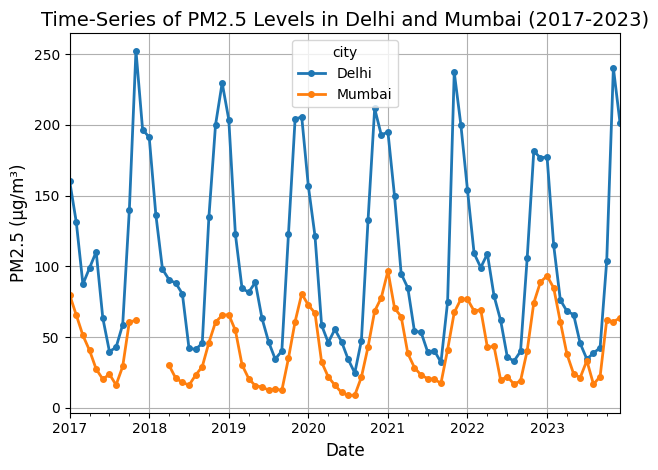

Delhi's PM2.5 fluctuation (std dev): 62.98
Mumbai's PM2.5 fluctuation (std dev): 24.53


In [18]:
#3
df=data
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d')

cities_data = df[df['city'].isin(['Delhi', 'Mumbai'])]             # Filter data for Delhi and Mumbai

cities_data['Year'] = cities_data['Timestamp'].dt.year           # Extract year and month from Timestamp
cities_data['Month'] = cities_data['Timestamp'].dt.month

cities_data = cities_data[(cities_data['Year'] >= 2017) & (cities_data['Year'] <= 2023)]        # Filter data for the years 2017-2023

avg_pm25_cities = cities_data.groupby(['city', 'Year', 'Month'])['PM2.5'].mean().reset_index()    # Calculate the monthly average PM2.5 for both cities

avg_pm25_cities['Date'] = pd.to_datetime(avg_pm25_cities[['Year', 'Month']].assign(DAY=1))   # Create a datetime column for plotting

avg_pm25_pivot = avg_pm25_cities.pivot(index='Date', columns='city', values='PM2.5')     # Pivot the data so we have separate columns for Delhi and Mumbai

plt.figure(figsize=(12, 6))      # Plotting the time-series graph
avg_pm25_pivot.plot(kind='line', marker='o', linestyle='-', markersize=4, linewidth=2)

plt.title('Time-Series of PM2.5 Levels in Delhi and Mumbai (2017-2023)', fontsize=14)    # Adding labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.grid(True)

plt.tight_layout()    # ploting
plt.show()

delhi_fluctuation = avg_pm25_pivot['Delhi'].std()           # Calculate fluctuations (standard deviation) for each city
mumbai_fluctuation = avg_pm25_pivot['Mumbai'].std()

print(f"Delhi's PM2.5 fluctuation (std dev): {delhi_fluctuation:.2f}")
print(f"Mumbai's PM2.5 fluctuation (std dev): {mumbai_fluctuation:.2f}")

## Population-Base

In [20]:
#importing data
data = pd.read_csv(r"C:\Users\Nayan\Downloads\Data.csv")
state= pd.read_csv(r"C:\Users\Nayan\Downloads\State_data.csv")
#so that columns name is same in both
state.rename(columns={"State":"state"}, inplace=True)
#grouped stations by state and counted them in a new dataframe
station_per_state = data.groupby('state')['station'].count().reset_index()
#merged count of stations and population dataframes
merged_df = station_per_state.merge(state, on='state', how='outer')
#added new column of perpopulation station count
merged_df["Station_per_population"]=merged_df["station"]/merged_df["Population"]
#found the max and created a mask. applied the mask and printed the state name
print(merged_df[merged_df["Station_per_population"]==max(merged_df["Station_per_population"])]["state"])


4    Chandigarh
Name: state, dtype: object


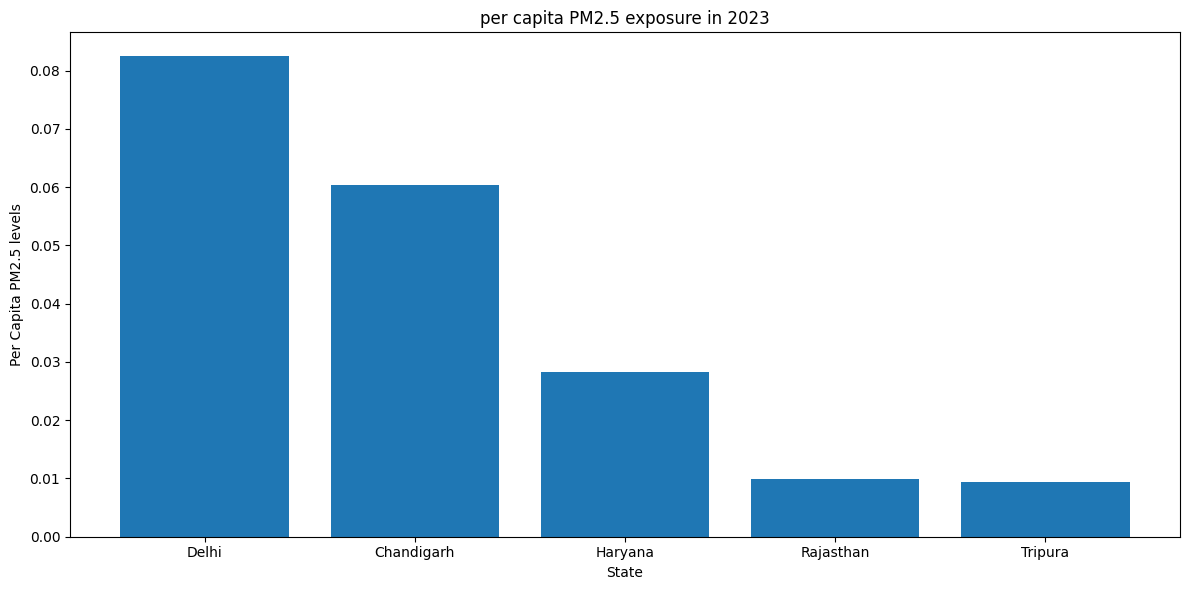

In [22]:
#importing data
data = pd.read_csv(r"C:\Users\Nayan\Downloads\Data.csv")
state= pd.read_csv(r"C:\Users\Nayan\Downloads\State_data.csv")

#so that columns name is same in both
state.rename(columns={"State":"state"}, inplace=True)
#converting string entry to datetime entry in timestamp cloumn
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
#masking for year 2023 and applying the mask and creating a new df from it
data_2023 = data[data['Timestamp'].dt.year == 2023]
#grouping the pm25 by states and summing all of it
pm25_per_state = data_2023.groupby('state')['PM2.5'].sum().reset_index()
#merging pm25 year 2023 data df with population df
merged_df = pm25_per_state.merge(state, on='state', how='outer')
#added new column of percapita pm25 pollution
merged_df["percapita_polution"]=merged_df["PM2.5"]/merged_df["Population"]
#sorting pm25 in descending
merged_df.sort_values("percapita_polution", ascending=False, inplace=True)
#top5
top5_poluted=merged_df[:5]

#bargraph
bargraph= plt
bargraph.figure(figsize=(12, 6))  # Adjust figure size as needed
bargraph.bar(top5_poluted['state'], top5_poluted['percapita_polution'])
bargraph.xlabel("State")
bargraph.ylabel("Per Capita PM2.5 levels")
bargraph.title("per capita PM2.5 exposure in 2023")
bargraph.tight_layout()
bargraph.show()



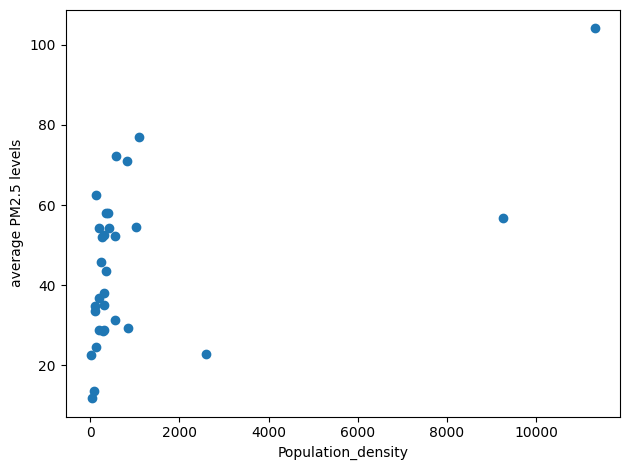

In [24]:
#importing data
data = pd.read_csv(r"C:\Users\Nayan\Downloads\Data.csv")
state= pd.read_csv(r"C:\Users\Nayan\Downloads\State_data.csv")
#so that columns name is same in both
state.rename(columns={"State":"state"}, inplace=True)
#creating population density column in state df
state["Population_density"]=state["Population"]/state["Area (km2)"]
#grouping the pm25 by states and averaging all of it
pm25_per_state = data.groupby('state')['PM2.5'].mean().reset_index()
#merging pm25 data df with population df
merged_df = pm25_per_state.merge(state, on='state', how='outer')

#scatter plt
sct= plt
sct.scatter(merged_df['Population_density'], merged_df['PM2.5'])
sct.xlabel("Population_density")
sct.ylabel("average PM2.5 levels")
sct.tight_layout()
sct.show()

## Area Based

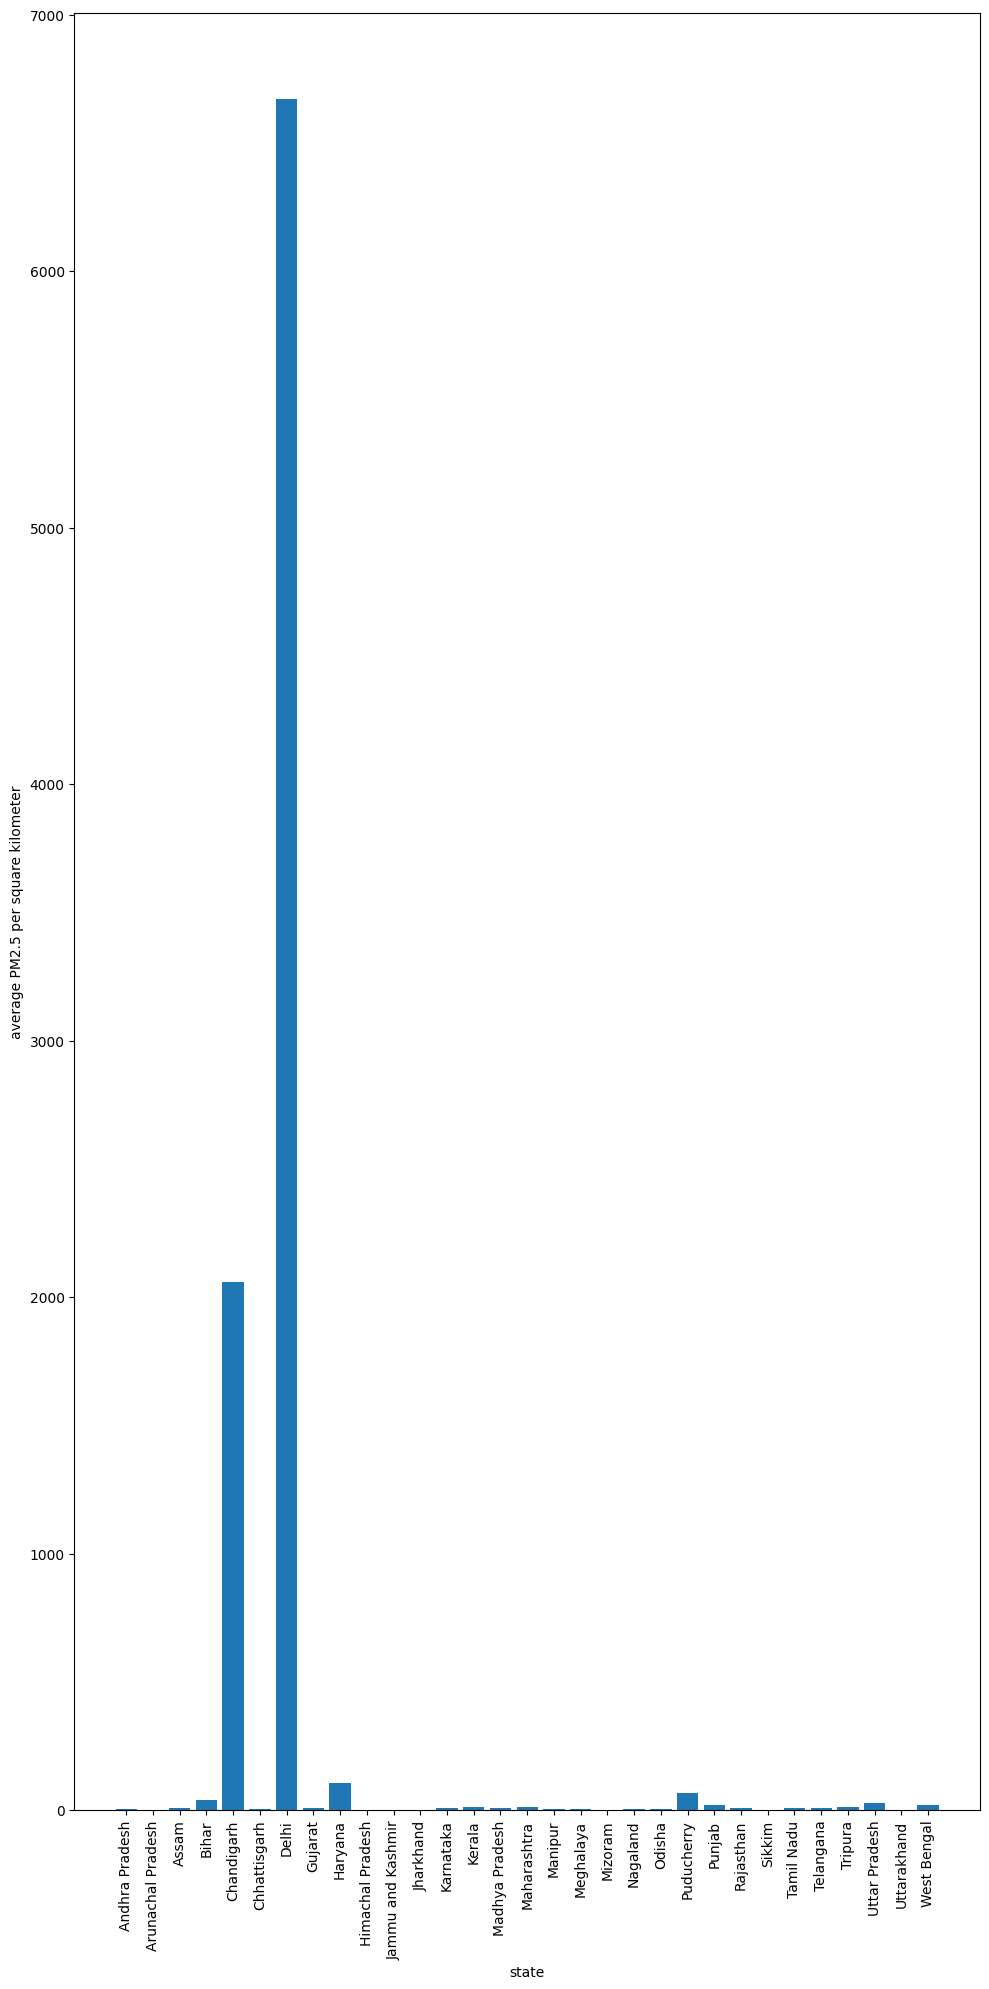

In [26]:
#importing data
data = pd.read_csv(r"C:\Users\Nayan\Downloads\Data.csv")
state= pd.read_csv(r"C:\Users\Nayan\Downloads\State_data.csv")#contains population and area details
#so that columns name is same in both dfs
state.rename(columns={"State":"state"}, inplace=True)
#grouping the pm25 by states and summing all of it
pm25_per_state = data.groupby('state')['PM2.5'].sum().reset_index()
#merging pm25 data df with area df
merged_df = pm25_per_state.merge(state, on='state', how='outer')
#to find PM2.5 concentration per square kilometer
merged_df["PM2.5_km2"]= merged_df['PM2.5']/merged_df["Area (km2)"]

#bar plt
brgr= plt
brgr.figure(figsize=(10, 20))
brgr.bar(merged_df['state'], merged_df['PM2.5_km2'])
brgr.xlabel("state")
brgr.xticks(rotation=90)
brgr.ylabel("average PM2.5 per square kilometer")
brgr.tight_layout()
brgr.show()

In [ ]:
#importing data
data = pd.read_csv(r"C:\Users\Nayan\Downloads\Data.csv")
state= pd.read_csv(r"C:\Users\Nayan\Downloads\State_data.csv")
#so that columns name is same in both
state.rename(columns={"State":"state"}, inplace=True)
#grouped stations by state and counted them in a new dataframe
station_per_state = data.groupby('state')['station'].count().reset_index()
station_per_state

In [ ]:
#importing data
data = pd.read_csv(r"C:\Users\Nayan\Downloads\Data.csv")
state= pd.read_csv(r"C:\Users\Nayan\Downloads\State_data.csv")
#so that columns name is same in both
state.rename(columns={"State":"state"}, inplace=True)
#converting string entry to datetime entry in timestamp cloumn
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
#masking for year 2021 and applying the mask and creating a new df from it
data_2021 = data[data['Timestamp'].dt.year == 2021]

#grouping the pm25 by states and summing all of it
pm25_per_state = data_2021.groupby('state')['PM2.5'].mean().reset_index()
#merging pm25 year 2021 data df with population df
merged_df = pm25_per_state.merge(state, on='state', how='outer')
#added new column of percapita pm25 pollution
merged_df["population_Density"]=merged_df["Population"]/merged_df["Area (km2)"]
#sorting pm25 in descending

d= (merged_df['state']=="Maharashtra") | (merged_df['state']=="Madhya Pradesh")
#print(d)
#bargraph
bargraph1= plt
bargraph1.bar(merged_df[d]["state"], merged_df[d]['PM2.5'])
bargraph1.xlabel("State")
bargraph1.ylabel("average PM2.5 levels")
bargraph1.tight_layout()
bargraph1.show()

bargraph2= plt
bargraph2.bar(merged_df[d]["state"], merged_df[d]['population_Density'])
bargraph2.xlabel("State")
bargraph2.ylabel("population density")
bargraph2.tight_layout()
bargraph2.show()

## Funding Based  

#### Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.


In [ ]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')
ncap_data["Total fund released"] = pd.to_numeric(ncap_data["Total fund released"], errors='coerce')

funded_states = ncap_data[ncap_data["Total fund released"] > 0]["State"].unique()
state_data["NCAP_Funded"] = state_data["State"].apply(lambda x: "Funded" if x in funded_states else "Non-Funded")
df_2021 = data[data["Timestamp"].dt.year == 2021]
df_2021 = df_2021.dropna(subset=["PM2.5", "state"])
pm25_funding_comparison = data.merge(state_data[["State", "NCAP_Funded"]],left_on="state", right_on="State", how="left")
pm25_comparison = pm25_funding_comparison.groupby("NCAP_Funded")["PM2.5"].mean()

plt.figure(figsize=(6, 4))
plt.bar(pm25_comparison.index, pm25_comparison.values, color=['red', 'green'])

plt.xlabel("NCAP Funding Status")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Comparison of PM2.5 Levels in Funded vs Non-Funded States (2021)")

plt.show()

#### Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


In [ ]:
assam_air_quality = data[data['state'] == 'Assam'].copy()
assam_ncap_funding = ncap_data[ncap_data['State'] == 'Assam']

assam_air_quality.loc[:,'Year'] = assam_air_quality['Timestamp'].dt.year
pm25_yearly = assam_air_quality.groupby('Year')['PM2.5'].mean().reset_index()

assam_ncap_funding = assam_ncap_funding[['Year', 'Total fund released']]

merged_data = pd.merge(pm25_yearly, assam_ncap_funding, on='Year', how='left')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5 (µg/m³)', color='tab:blue')
ax1.plot(merged_data['Year'], merged_data['PM2.5'], color='tab:blue', label='PM2.5 Levels', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Total NCAP Funding', color='green')
ax2.plot(merged_data['Year'], merged_data['Total fund released'], color='green', label='NCAP Funding', marker='x')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('PM2.5 Levels and NCAP Funding for Assam (Yearly)', fontsize=14)
fig.tight_layout()

plt.show()


#### Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


In [ ]:
for col in ["Total fund released"]:
    df_2[col] = pd.to_numeric(df_2[col], errors="coerce")

state_funding = df_2.groupby("state")["Total fund released"].sum().reset_index()
state_funding = state_funding.merge(df1, on="state", how="left") 

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=state_funding,
    x="Area (km2)", 
    y="Total fund released", 
    hue="state",  
    palette="tab20",
    s=100,  
    edgecolor="black"
)
plt.show()

In [20]:
### 

In [22]:
df_2023 = data[data['Timestamp'].dt.year == 2023]

# Step 3: Calculate the average PM2.5 levels for each city in 2023
average_pm25_city = df_2023.groupby('city')['PM2.5'].mean()

# Step 4: Find the city with the highest average PM2.5 level
most_polluted_city = average_pm25_city.idxmax()
highest_avg_pm25 = average_pm25_city.max()

# Step 5: Filter data for the most polluted city
city_data = df_2023[df_2023['city'] == most_polluted_city]

# Step 6: Calculate the number of days with PM2.5 above 300 µg/m³
hazardous_days = city_data[city_data['PM2.5'] > 300].shape[0]

# Step 7: Calculate the total number of days for the city
total_days = city_data['Timestamp'].nunique()

# Step 8: Calculate the percentage of hazardous days
hazardous_percentage = (hazardous_days / total_days) * 100

# Step 9: Output the results
print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Highest average PM2.5 level: {highest_avg_pm25:.2f} µg/m³")
print(f"Percentage of hazardous days (PM2.5 > 300 µg/m³) in {most_polluted_city}: {hazardous_percentage:.2f}%")

NameError: name 'df' is not defined

In [24]:
df["month"]=df["Timestamp"].dt.month
df["year"]=df["Timestamp"].dt.year

df_diwali=df[(df["month"].isin([10,11]))&(df["year"].isin([2018,2019,2020]))]
diwali_average=df_diwali["PM2.5"].mean()
print(f"Average PM2.5 levels during diwali were {diwali_average} units.")

df_newyear=df[(df["Timestamp"].dt.month==1)&(df["Timestamp"].dt.day==1)&(df["year"].isin([2018,2019,2020]))]
newyear_average=df_newyear["PM2.5"].mean()
print(f"Average PM2.5 levels during New year were {newyear_average} units.")

df_normal=df[(df["month"].isin([2,3,4,5,6,7,8,9,12]))&(df["year"].isin([2018,2019,2020]))]
normal_average=df_normal["PM2.5"].mean()
print(f"Average PM2.5 levels in rest of the year were {normal_average} units.")

plt.plot(df_diwali["Timestamp"], df_diwali["PM2.5"], color="red", label="Diwali")
plt.annotate("Diwali", xy=(df_diwali["Timestamp"].median(), diwali_average),xytext=(df_diwali["Timestamp"].median(), diwali_average + 50),arrowprops=dict(facecolor="red", arrowstyle="->"))

plt.plot(df_newyear["Timestamp"], df_newyear["PM2.5"], color="blue", label="New Year")
plt.annotate("New Year", xy=(df_newyear["Timestamp"].median(), newyear_average),xytext=(df_newyear["Timestamp"].median(), newyear_average + 50),arrowprops=dict(facecolor="blue", arrowstyle="->"))

plt.xlabel("Timeline")
plt.ylabel("PM2.5 Level")
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

NameError: name 'df' is not defined

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Initialize the map
plt.figure(figsize=(10, 6))
m = Basemap(projection="mill", llcrnrlat=5, urcrnrlat=35, llcrnrlon=65, urcrnrlon=100, resolution="l")

# Draw map details
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color="aqua")
m.fillcontinents(color="lightgray", lake_color="aqua")

# Convert lat/lon to map coordinates
if "lat" in df.columns and "lon" in df.columns:
    x, y = m(df["lon"].values, df["lat"].values)
    plt.scatter(x, y, c=df["PM2.5"], cmap="Reds", marker="o", alpha=0.7)
    plt.colorbar(label="PM2.5 Level (µg/m³)")

plt.title("Air Quality Monitoring Stations in India")
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [28]:
india_boundary=ox.geocode_to_gdf("India")
sensor_locations=df[['latitude', 'longitude', 'station']].dropna()

fig, ax=plt.subplots(figsize=(10, 10))
india_boundary.plot(ax=ax, color='lightgreen', edgecolor='black')
ax.scatter(sensor_locations['longitude'], sensor_locations['latitude'], 
           color='black', marker='^', s=50, edgecolors='white', label='Sensor Locations')
ax.set_title('Sensor Locations in India', fontsize=12)
ax.legend(loc='upper right')
plt.show()

NameError: name 'ox' is not defined

## Tell us something new

In [32]:
pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature


data.rename(columns={"Latitude": "latitude", "Longitude": "longitude"}, inplace=True)

sensor_locations = data.dropna(subset=["latitude", "longitude"])
fig = plt.figure(figsize=(10, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle="--", linewidth=1)
ax.add_feature(cfeature.LAND, color="skyblue")
ax.set_extent([68, 98, 6, 38])

plt.scatter(sensor_locations["longitude"], sensor_locations["latitude"], color="red", s=10, label="Sensor Locations", transform=ccrs.PlateCarree())
plt.title("India - PM2.5 Sensor Locations")

plt.legend()
plt.show()

SyntaxError: invalid syntax (3817711646.py, line 1)